# Topic - Adult Income Census

Mudit Chugh

## Objective of this project:
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation.    

## Data description:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. The prediction task is to determine whether a person makes over $50K a year.

## Features Description: 

### - Independent Variables:

#### 1) Continuous Attributes -

Age:               continuous.  - Age of an individual

Fnlwgt:            continuous.  - final weight, prepared monthly by Population Division at the Census Bureau.

Educational-num:   continuous.  - Individual's highest education degree
 
Hours-per-week:    continuous.  - Individual's working hour per week

Capital-gain:      continuous.  

Capital-loss:      continuous. 

##### 2) Categorical Attributes - 

Workclass:       Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
                 - Individual work category
                 
Education:       Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-                  4th, 10th, Doctorate, 5th-6th, Preschool.
                 - Individual's highest education degree


Marital-status:  Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF- spouse.
                 - Individual marital status
                 
Occupation:      Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-                  op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed- Forces.
                 - Individual's occupation
                 
Relationship:    Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
                 - Individual's relation in a family
                 
Race:            White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
                 - Race of Individual
                 
Sex:             Female, Male.
                 
Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,                      Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                     Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,                     Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
                - Individual's native country
                

### - Dependent Variable:

Income : <=50K and >50K

## Step 1: Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import cufflinks as cf
import plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
cf.go_offline()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from scipy import stats

##  Step 2: Data Preperation

In [4]:
df = pd.read_csv('adult.csv')

In [5]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

#### Renaming Some of The Attributes having wrong spelling

In [6]:
df = df.rename({'captial_gain':'capital_gain','captial_loss':'capital_loss'}, axis=1)
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [7]:
df.shape

(48842, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
df['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [12]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [14]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [15]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Exploratory Data Analysis

The maximum age is 90
The minimum age is 17


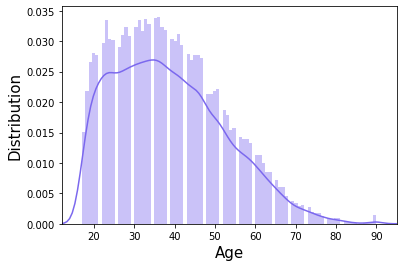

In [17]:
sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

In [18]:
df['workclass'].iplot(kind='hist',title='Job Distribution',xTitle='Job',yTitle='Count')

In [19]:
df['race'].iplot(kind='hist',xTitle='Race',yTitle='Count',color='blue')

In [20]:
df['education'].iplot(kind='hist',title='Education Distribution',xTitle='Education',yTitle='Count',color='green')

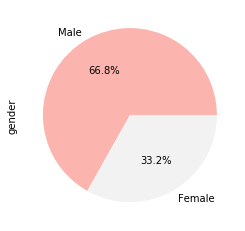

In [21]:
df['gender'].value_counts().plot.pie(cmap = 'Pastel1',autopct='%.1f%%');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



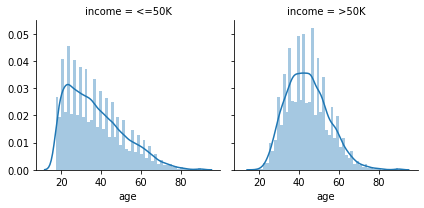

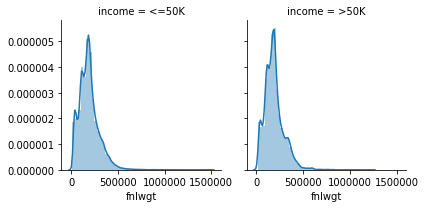

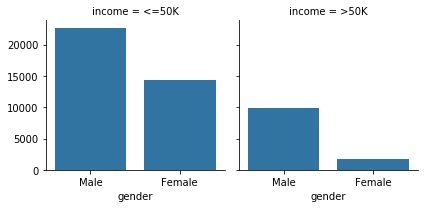

In [22]:
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")

g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "fnlwgt")

g = sns.FacetGrid(df, col='income')
g = g.map(sns.countplot, "gender")
plt.show()

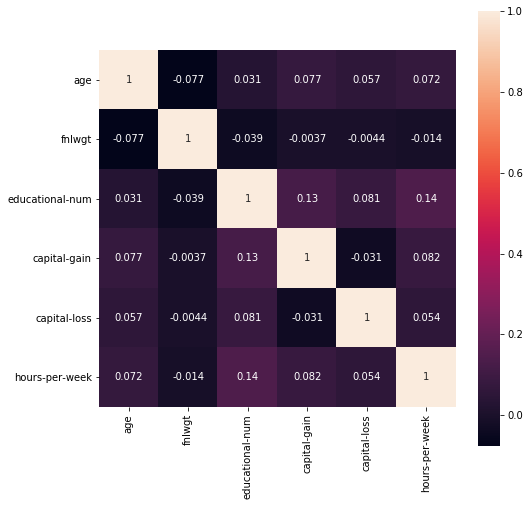

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True,square = True);

## Data Cleaning and Preprocessing:

### Dealing with null values:

In [24]:
df.isnull().values.any()

False

In [25]:
df = df.replace('?', np.NaN)

In [26]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [27]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [28]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Preprocessing of data to apply machine learning

In [29]:
print('1º Quartile: ', df['age'].quantile(q = 0.25))
print('2º Quartile: ', df['age'].quantile(q = 0.50))
print('3º Quartile: ', df['age'].quantile(q = 0.75))
print('4º Quartile: ', df['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    


1º Quartile:  28.0
2º Quartile:  37.0
3º Quartile:  48.0
4º Quartile:  90.0


In [30]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 28, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 37) & (dataframe['age'] <= 48), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 90), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 90) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe
    
age(df);

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

df['workclass']      = labelencoder_X.fit_transform(df['workclass']) 
df['education']= labelencoder_X.fit_transform(df['education']) 
df['marital-status']  = labelencoder_X.fit_transform(df['marital-status'])
df['gender']  = labelencoder_X.fit_transform(df['gender']) 
df['occupation']  = labelencoder_X.fit_transform(df['occupation']) 
df['relationship']  = labelencoder_X.fit_transform(df['relationship']) 

In [32]:
df.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0    1          3  226802          1                7               4   
1    2          3   89814         11                9               2   
2    1          1  336951          7               12               2   
3    2          3  160323         15               10               2   
4    1          3  103497         15               10               4   

   occupation  relationship   race  gender  capital-gain  capital-loss  \
0           6             3  Black       1             0             0   
1           4             0  White       1             0             0   
2          10             0  White       1             0             0   
3           6             0  Black       1          7688             0   
4           9             3  White       0             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

### Selecting necessary attributes for model building

In [33]:
data = df.loc[: , ['age', 'workclass','fnlwgt', 'educational-num', 'marital-status', 'gender',
                           'capital-gain', 'capital-loss','hours-per-week', ]]

In [34]:
data.head()

age  workclass  fnlwgt  educational-num  marital-status  gender  \
0    1          3  226802                7               4       1   
1    2          3   89814                9               2       1   
2    1          1  336951               12               2       1   
3    2          3  160323               10               2       1   
4    1          3  103497               10               4       0   

   capital-gain  capital-loss  hours-per-week  
0             0             0              40  
1             0             0              50  
2             0             0              40  
3          7688             0              40  
4             0             0              30

In [35]:
data_target = df.loc[:,['income']]

In [36]:
data_target['income']  = labelencoder_X.fit_transform(data_target['income']) 

In [37]:
data_target.head()

income
0       0
1       0
2       1
3       1
4       0

In [38]:
data_target.isnull().sum()

income    0
dtype: int64

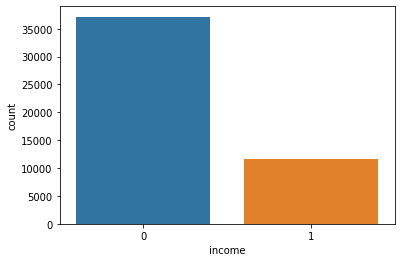

In [39]:
sns.countplot(x='income',data = data_target)

### Final Dataset

In [40]:
data_final= pd.concat([data, data_target], axis = 1)

In [41]:
data_final.head()

age  workclass  fnlwgt  educational-num  marital-status  gender  \
0    1          3  226802                7               4       1   
1    2          3   89814                9               2       1   
2    1          1  336951               12               2       1   
3    2          3  160323               10               2       1   
4    1          3  103497               10               4       0   

   capital-gain  capital-loss  hours-per-week  income  
0             0             0              40       0  
1             0             0              50       0  
2             0             0              40       1  
3          7688             0              40       1  
4             0             0              30       0

In [42]:
data_final.shape

(48842, 10)

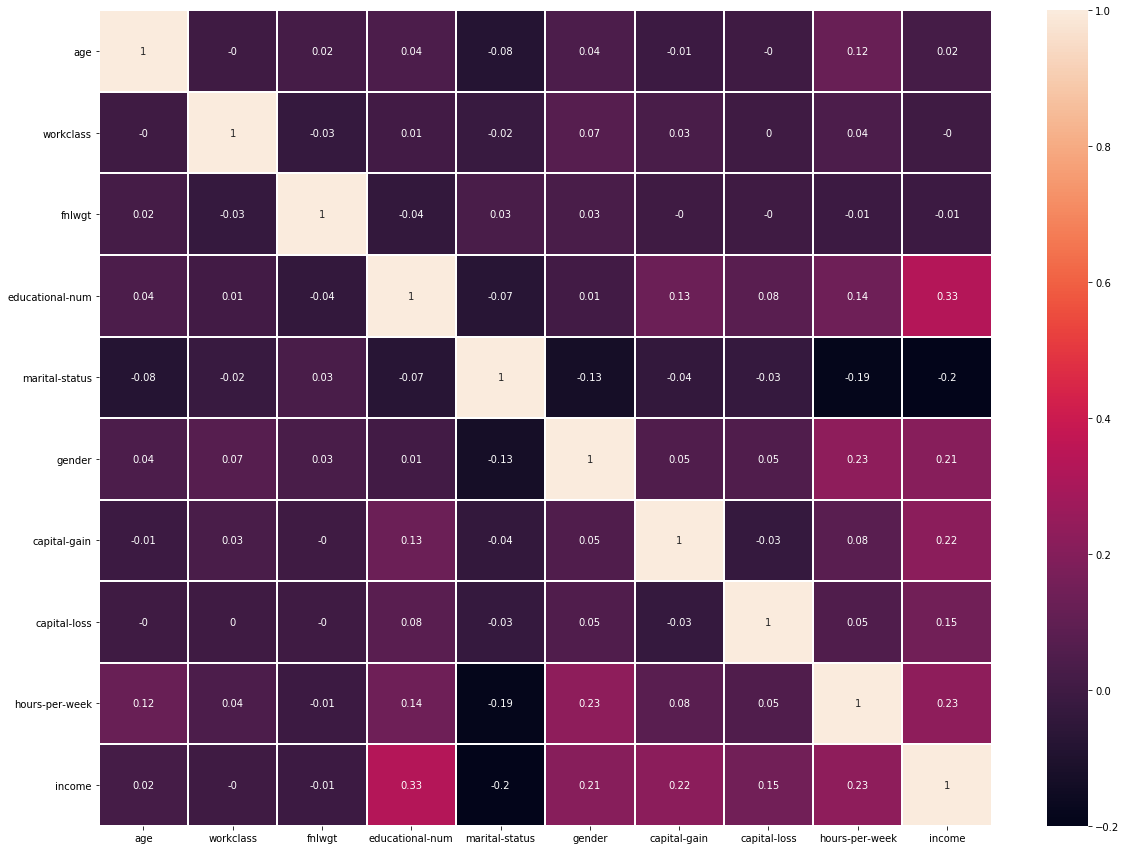

In [43]:
plt.figure(figsize=(20,15))
sns.heatmap(round(data_final.corr(),2),annot = True,linewidths=1,linecolor='white')

# Model Building

## 1. Logistic Regression

In [44]:
x = data_final.iloc[:,:-1].values
y = data_final.iloc[:,-1].values

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [46]:
logmodel = LogisticRegression()

In [47]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
log_predictions = logmodel.predict(x_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11122
           1       0.73      0.26      0.39      3531

    accuracy                           0.80     14653
   macro avg       0.77      0.62      0.63     14653
weighted avg       0.79      0.80      0.76     14653



In [51]:
print(confusion_matrix(y_test,log_predictions))

[[10782   340]
 [ 2601   930]]


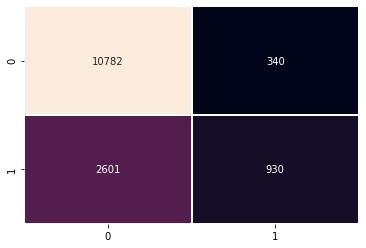

In [52]:
value = confusion_matrix(y_test,log_predictions)
sns.heatmap(value, annot = True ,linewidths=1,linecolor='white',cbar=False,fmt='d')

In [53]:
print('True negative=',10589)
print('')
print('True positive=',1076)
print('')
print('False positive=',533)
print('')
print('False negative=',2455)

True negative= 10589

True positive= 1076

False positive= 533

False negative= 2455


In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = x_train, y = y_train, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages

In [55]:
acc = round(accuracies.mean(),2)

In [56]:
print('Accuracy =',acc*100,'%')

Accuracy = 80.0 %


## 2. K Nearest Neighbors(KNN)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
error_rate = [] 

for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    predictions_i = knn.predict(x_test)
    
    error_rate.append(np.mean(predictions_i != y_test))

In [60]:
error_rate

[0.27359585067904185,
 0.21517777929434245,
 0.2427489251347847,
 0.2115607725380468,
 0.22459564594281034,
 0.20814850201323962,
 0.21729338701972292,
 0.20610113969835528,
 0.2110830546645738,
 0.20480447689892856,
 0.20746604790827816,
 0.20391728656247868,
 0.2058281580563707,
 0.2035078140995018,
 0.20480447689892856,
 0.20357605950999796,
 0.20262062376305193,
 0.2019381696580905,
 0.20050501603767146,
 0.20139220637412134,
 0.20057326144816762,
 0.20105097932164062,
 0.20077799767965604,
 0.2014604517846175]

Text(0, 0.5, 'Error Rate')

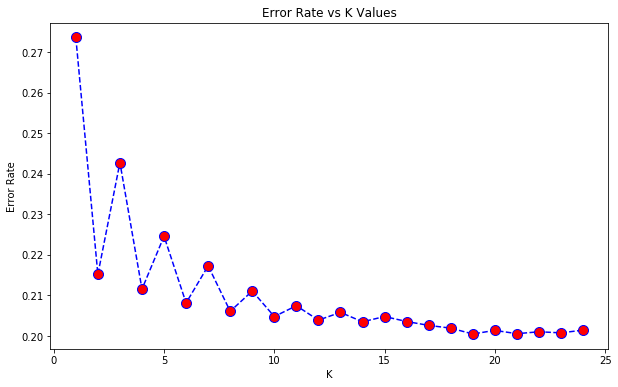

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [62]:

knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [63]:
knn_predictions = knn.predict(x_test)

In [64]:
knn_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     11122
           1       0.85      0.20      0.32      3531

    accuracy                           0.80     14653
   macro avg       0.82      0.59      0.60     14653
weighted avg       0.81      0.80      0.75     14653



In [66]:
print(confusion_matrix(y_test,knn_predictions))

[[11000   122]
 [ 2824   707]]


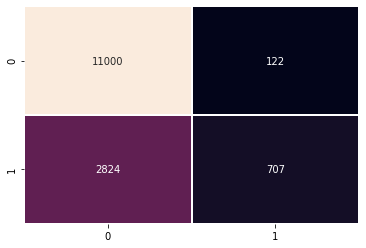

In [67]:
value = confusion_matrix(y_test,knn_predictions)
sns.heatmap(value, annot = True ,linewidths=1,linecolor='white',cbar=False,fmt='d')

In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = 10)

In [69]:
accuarcy = round(accuracies.mean(),2)

In [70]:
print('Accuracy =',accuarcy*100,'%')

Accuracy = 80.0 %


## 3. Support Vector Machine

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [72]:
from sklearn.svm import SVC

In [73]:
model = SVC(kernel='rbf')

In [74]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
svm_predictions = model.predict(x_test)

In [76]:
svm_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     11122
           1       0.97      0.16      0.27      3531

    accuracy                           0.80     14653
   macro avg       0.88      0.58      0.58     14653
weighted avg       0.83      0.80      0.73     14653



In [79]:
print(confusion_matrix(y_test,svm_predictions))

[[11104    18]
 [ 2971   560]]


In [80]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

In [81]:
accuarcy = round(accuracies.mean(),2)

In [82]:
print('Accuracy =',accuarcy*100,'%')

Accuracy = 80.0 %


## 4. Decision Tree

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=101)

In [87]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [88]:
tree_predictions = dtree.predict(x_test)

In [89]:
tree_predictions

array([0, 0, 0, ..., 0, 0, 1])

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(y_test,tree_predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     11122
           1       0.62      0.61      0.61      3531

    accuracy                           0.82     14653
   macro avg       0.75      0.74      0.75     14653
weighted avg       0.81      0.82      0.81     14653



In [92]:
print(confusion_matrix(y_test,tree_predictions))

[[9800 1322]
 [1387 2144]]


In [93]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree, X = x_train, y = y_train, cv = 10)

In [94]:
accuarcy = round(accuracies.mean(),2)

In [95]:
print('Accuracy =',accuarcy*100,'%')

Accuracy = 81.0 %


## 5. Random Forest

In [96]:
data_final.head()

age  workclass  fnlwgt  educational-num  marital-status  gender  \
0    1          3  226802                7               4       1   
1    2          3   89814                9               2       1   
2    1          1  336951               12               2       1   
3    2          3  160323               10               2       1   
4    1          3  103497               10               4       0   

   capital-gain  capital-loss  hours-per-week  income  
0             0             0              40       0  
1             0             0              50       0  
2             0             0              40       1  
3          7688             0              40       1  
4             0             0              30       0

In [97]:
x = data_final.drop('income',axis=1)

y = data_final['income']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=101)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [101]:
rfc_pred = rfc.predict(x_test)


In [102]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11122
           1       0.70      0.62      0.65      3531

    accuracy                           0.84     14653
   macro avg       0.79      0.77      0.78     14653
weighted avg       0.84      0.84      0.84     14653



In [103]:
print(confusion_matrix(y_test,rfc_pred))

[[10176   946]
 [ 1358  2173]]


In [104]:
print('True negative=',10176)
print('')
print('True positive=',2173)
print('')
print('False positive=',946)
print('')
print('False negative=',1358)

True negative= 10176

True positive= 2173

False positive= 946

False negative= 1358


In [105]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)

In [106]:
accuarcy = round(accuracies.mean(),2)

In [107]:
print('Accuracy =',accuarcy*100,'%')

Accuracy = 84.0 %


## Comparison

In [108]:
models = pd.DataFrame({'Models': ['Logistic Regression','K Nearest Neighbors (knn)','Support Vector Machine (Svm)',
                                  'Decision Tree','Random Forest'],
                       'Accuracy using K-Fold cross validation (in %)':  [80,80,80,82,84],
                       'Precision class-0 (in %)': [81,80,79,88,88],
                       'Recall class-0 (in %)': [97,99,100,88,91],
                      })

In [109]:
models

Models  \
0           Logistic Regression   
1     K Nearest Neighbors (knn)   
2  Support Vector Machine (Svm)   
3                 Decision Tree   
4                 Random Forest   

   Accuracy using K-Fold cross validation (in %)  Precision class-0 (in %)  \
0                                             80                        81   
1                                             80                        80   
2                                             80                        79   
3                                             82                        88   
4                                             84                        88   

   Recall class-0 (in %)  
0                     97  
1                     99  
2                    100  
3                     88  
4                     91

## Conclusion

### Best Model Random Forest  with Accuracy 84%

### Thank You

### Mudit Chugh